## Decison Tree

A decision tree is a popular machine learning algorithm that is used for both classification and regression tasks. It is a tree-like model where each internal node represents a decision based on a specific feature or attribute, and each leaf node represents a class label or a numerical value.

It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

<div>
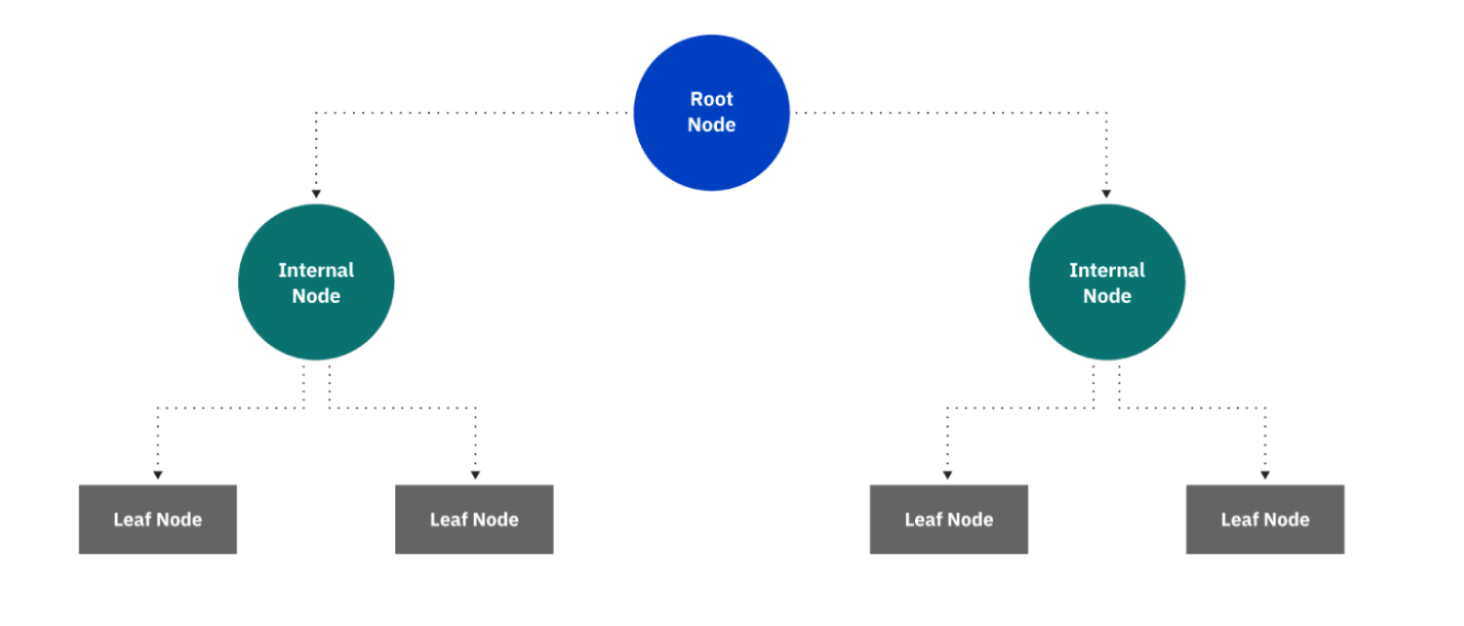
<div>

To do this, follow these steps:

### Determine Root node and Training
    
- Root node contains a feature that best splits the data.
The variable with the lowest entropy is then used as a root node.
    Entropy metric: $$ E(S) = - \sum p_i logp_i$$
Especially here, $p_i$ stands for the probability of counted label exists.
- Calculate the Information gain metric. Information gain metric represents an average of all entropy values based on a specific split. 

Information gain can be calculated with the following formula:
$$ Gain(S, A) = E(S) - \sum_{v \in Values(A)}^{} \frac{|S_v|}{|S|}E(S_v)$$

The algorithm then goes over all input features and their unique values, calculates information gain for every combination, and saves the best split feature and threshold for every node. Once the leaf node is reached, the most common value is returned.

### make the prediction
- Leaf nodes is final nodes at which the prediction is made.

## Decision Tree Method Implemention
About Dataset
from: https://archive.ics.uci.edu/ml/datasets/car+evaluation

### Preprocessing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn import svm, datasets
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#explore the data to gain insights about the data.
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/car_evaluation.csv')
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X = df.drop(['class'], axis=1)
y = df['class']
X = encoder.fit_transform(X)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


### Split data and Perform decision tree

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [5]:

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Predict the Test set results with criterion entropy

In [ ]:
y_pred = decision_tree.predict(X_test)

### Check accuracy score with criterion entropy

In [6]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.8828


### Visualize Decision Trees
Now that our model has been trained we can visualize the tree structure of our current model by calling the sklearn.tree.plot_tree() function. An example of this can be seen by running the following code cell.

[Text(0.5, 0.9166666666666666, 'X[5] <= 2.5\ngini = 0.457\nsamples = 1036\nvalue = [228, 45, 726, 37]'),
 Text(0.4375, 0.75, 'X[3] <= 1.5\ngini = 0.582\nsamples = 687\nvalue = [228, 45, 377, 37]'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 219\nvalue = [0, 0, 219, 0]'),
 Text(0.5, 0.5833333333333334, 'X[0] <= 2.5\ngini = 0.633\nsamples = 468\nvalue = [228, 45, 158, 37]'),
 Text(0.25, 0.4166666666666667, 'X[1] <= 2.5\ngini = 0.497\nsamples = 233\nvalue = [108, 0, 125, 0]'),
 Text(0.125, 0.25, 'X[0] <= 1.5\ngini = 0.276\nsamples = 115\nvalue = [19, 0, 96, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 60\nvalue = [0, 0, 60, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.452\nsamples = 55\nvalue = [19, 0, 36, 0]'),
 Text(0.375, 0.25, 'X[4] <= 1.5\ngini = 0.371\nsamples = 118\nvalue = [89, 0, 29, 0]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.492\nsamples = 39\nvalue = [17, 0, 22, 0]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.162\nsamples = 79\nv

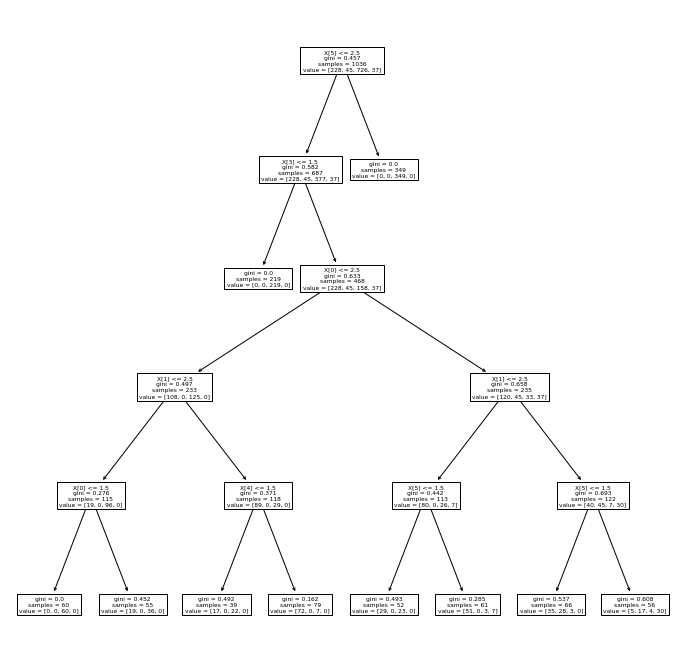

In [7]:
plt.figure(figsize=(12,12))

from sklearn import tree

tree.plot_tree(decision_tree.fit(X_train, y_train)) 

### Evaluate Models Performance

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [8]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
print('Confusion matrix\n\n', confusion_matrix(y_test, y_pred))

Confusion matrix

 [[123   0  28   5]
 [ 11   0   0  13]
 [ 18   0 465   0]
 [  6   0   0  22]]


Classification report is another way to evaluate the classification model performance.

In [11]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.78      0.79      0.78       156
        good       0.00      0.00      0.00        24
       unacc       0.94      0.96      0.95       483
       vgood       0.55      0.79      0.65        28

    accuracy                           0.88       691
   macro avg       0.57      0.63      0.60       691
weighted avg       0.86      0.88      0.87       691



In this project, I build a Decision-Tree Classifier model to predict the safety of the car. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.

In the model, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

The confusion matrix and classification report yields very good model performance.